In [298]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

In [301]:
file = 'posts-en-Apr-23-2023.csv'

In [304]:
posts = pd.read_csv(file)
print(posts.columns)
print(f'# of Posts: {posts.shape[0]}')

Index(['Unnamed: 0', 'keyword', 'title', 'author', 'body', 'time', 'date',
       'status', 'votes', 'num_comments', 'num_comment_pages', 'link',
       'has_status_update', 'status_message', 'status_update_date', 'lang'],
      dtype='object')
# of Posts: 1328


In [311]:
(posts.has_status_update == True).sum()
# 14 don't have status updates

1314

In [325]:
print(posts.head(1).status_message.values[0])

Updated on 2022-12-06
Hey folks,
 


Thanks for coming to the Spotify Idea Exchange and voting to make this happen.
 


We're happy to announce that this feature is now available on Android, iOS and Desktop.
 


Once again, thanks for helping us make Spotify better, by participating here on the Community.


In [443]:
posts.loc[posts.status_message.map(lambda x: type(x)) == float] = ""
# posts['status_update_date'] = posts.status_message.map(lambda x: x[11:21])
posts['status_update_date'] = posts.status_message.str.extract(r'(20[0-9]{2}-[0-9]{2}-[0-9]{2})')

In [448]:
posts.loc[posts.status_update_date.isna()].head(2)

,Unnamed: 0,keyword,title,author,body,time,date,status,votes,num_comments,num_comment_pages,link,has_status_update,status_message,status_update_date,lang
10,10,implemented,[Playlists] Limit Editing Access in Collaborat...,spot41,This problem has already been addressed in oth...,02:45 PM,2021-05-20,implemented,737,100,10,https://community.spotify.com/t5/Implemented-I...,True,Hey everyone!We're happy to announce that you ...,NaN,en
25,25,implemented,[Desktop] Add support for Apple Silicon (ARM64...,stogdan,Feature request: Add support for Apple Silicon...,02:28 PM,2020-11-11,implemented,3193,520,52,https://community.spotify.com/t5/Implemented-I...,True,"Hey everyone,\n \nThank you all for bringing y...",NaN,en


In [450]:
posts.loc[posts.status_update_date.notna()].status_update_date.map(lambda x: len(x)).value_counts()

status_update_date
10    1265
Name: count, dtype: int64

In [453]:
posts.date = posts.date.str.replace('‎','')

In [455]:
# filter out only implemented pots
impl_posts = posts[(posts['keyword'] == 'implemented')]

In [456]:
# posts.loc[posts.has_status_update == False].link.values
print((impl_posts.has_status_update == False).sum())
impl_posts.loc[impl_posts.has_status_update == False].link.values

# We want a ipad app! from 2012, that's it....

0


array([], dtype=object)

In [457]:
impl_posts['year'] = impl_posts.date.str.extract(r'(20[0-9]{2})')
impl_posts['status_update_year'] = impl_posts.status_update_date.str.extract(r'(20[0-9]{2})')

/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/3937440862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts['year'] = impl_posts.date.str.extract(r'(20[0-9]{2})')
/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/3937440862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts['status_update_year'] = impl_posts.status_update_date.str.extract(r'(20[0-9]{2})')


<Axes: title={'center': 'year posted'}, ylabel='count'>

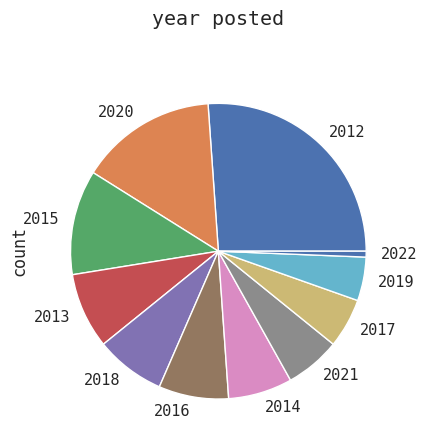

In [458]:
impl_posts.year.value_counts().plot.pie(title="year posted")

<Axes: title={'center': 'year implemented'}, ylabel='count'>

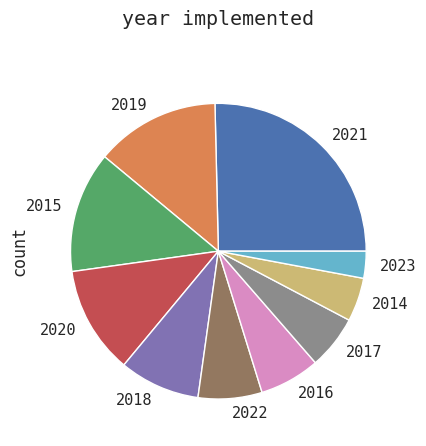

In [459]:
impl_posts.status_update_year.value_counts().plot.pie(title="year implemented")

In [460]:
impl_posts.head(1)

,Unnamed: 0,keyword,title,author,body,time,date,status,votes,num_comments,num_comment_pages,link,has_status_update,status_message,status_update_date,lang,year,status_update_year
0,0,implemented,[Mobile] Click lyric to go to lyric time,marcosw,To be able to go to the lyric part of a song a...,02:43 AM,2022-02-08,implemented,311,10,1,https://community.spotify.com/t5/Implemented-I...,True,"Updated on 2022-12-06\nHey folks,\n \n\n\nThan...",2022-12-06,en,2022,2022


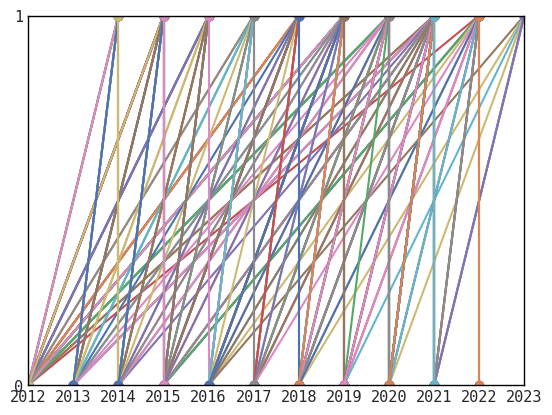

In [461]:
plt.figure()
for index, row in impl_posts.loc[impl_posts.status_update_year.notna()].sort_values(by=['year']).iterrows():
    plt.plot([int(row.year),int(row.status_update_year)],[0,1], linestyle='-', marker='o',)
plt.yticks([0,1])
plt.xticks(np.arange(2012,2024))
plt.show()

In [494]:
## DO THE SAME plot BUT WITH DAYS SINCE 2012-01-01, so it is a more precise and daily thing, can color code by category after
first_date = dt.strptime("2012-01-01", "%Y-%m-%d")
delta_df = pd.DataFrame()
delta_df["post"] = (impl_posts_valid_dates.posted_datetime - first_date)
delta_df["impl"] = (impl_posts_valid_dates.implemented_datetime - first_date)

In [498]:
impl_posts_valid_dates.columns

Index(['Unnamed: 0', 'keyword', 'title', 'author', 'body', 'time', 'date',
       'status', 'votes', 'num_comments', 'num_comment_pages', 'link',
       'has_status_update', 'status_message', 'status_update_date', 'lang',
       'year', 'status_update_year', 'implemented_datetime', 'posted_datetime',
       'delta_datetime'],
      dtype='object')

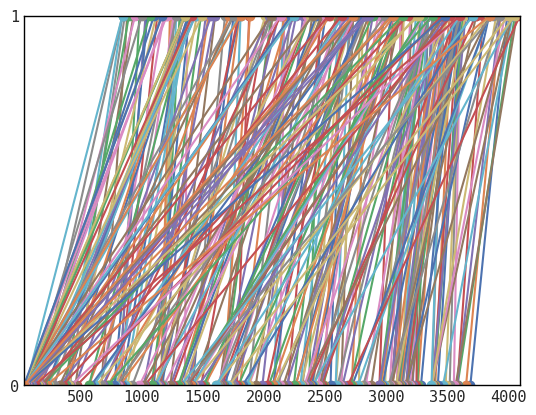

In [497]:
plt.figure()
for index, row in delta_df.iterrows():
    plt.plot([int(row.post.days),int(row.impl.days)],[0,1], linestyle='-', marker='o',)
plt.yticks([0,1])
plt.show()

In [468]:
# calcualte # of days to implementation then do a pie chart
impl_posts_valid_dates = impl_posts.loc[impl_posts.status_update_date.notna()]
impl_posts_valid_dates['implemented_datetime'] = impl_posts_valid_dates.status_update_date.map(lambda x: dt.strptime(x, "%Y-%m-%d"))
impl_posts_valid_dates['posted_datetime'] = impl_posts_valid_dates.date.map(lambda x: dt.strptime(x, "%Y-%m-%d"))
impl_posts_valid_dates['delta_datetime'] = impl_posts_valid_dates.implemented_datetime - impl_posts_valid_dates.posted_datetime

/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/3435213636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts_valid_dates['implemented_datetime'] = impl_posts_valid_dates.status_update_date.map(lambda x: dt.strptime(x, "%Y-%m-%d"))
/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/3435213636.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts_valid_dates['posted_datetime'] = impl_posts_valid_dates.date.map(lambda x: dt.strptime(x, "%Y-%m-%d"))
/var/fold

<Axes: title={'center': 'how long it has taken to implement in years'}, ylabel='Frequency'>

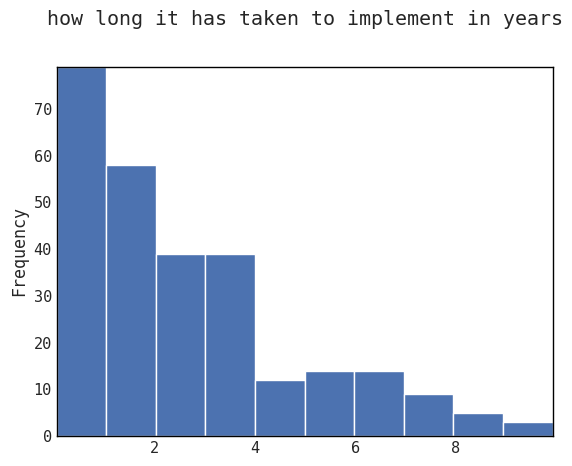

In [477]:
impl_posts_valid_dates.delta_datetime.map(lambda x: x.days / (365.25)).plot.hist(title="how long it has taken to implement in years")

<Axes: title={'center': 'how long it has taken to implement in days'}, ylabel='Frequency'>

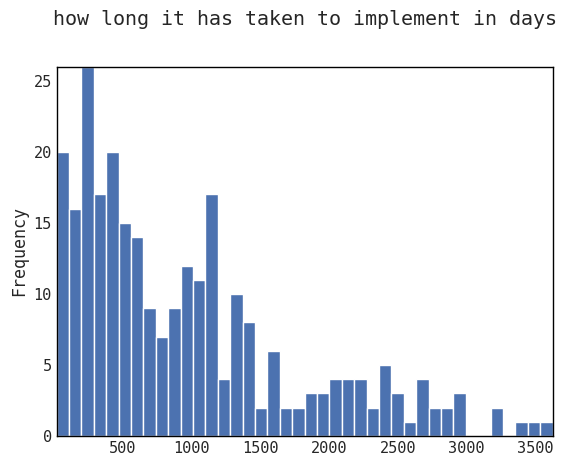

In [503]:
impl_posts_valid_dates.delta_datetime.map(lambda x: x.days).plot.hist(bins=40,title="how long it has taken to implement in days")

In [484]:
print("Average number of days to implementation")
impl_posts_valid_dates.delta_datetime.map(lambda x: x.days).mean()

Average number of days to implementation


967.4632352941177

In [430]:
impl_posts_valid_dates.status_update_date

0         2022-12-06
1         2022-10-12
2         2023-02-07
3         2022-05-24
4         2022-10-07
           ...      
310      as a clam t
312       you know, 
314    5-03-17\n \nH
315      ghted to of
316       2019-06-25
Name: status_update_date, Length: 314, dtype: object

In [428]:
from datetime import datetime as dt

dt.strptime(impl_posts_valid_dates.head(1).date.values[0], "%Y-%m-%d") - dt.strptime(impl_posts_valid_dates.head(1).status_update_date.values[0], "%Y-%m-%d") 

ValueError: time data ' 2022-12-06' does not match format '%Y-%m-%d'

'2022-02-08'

In [327]:
# implemented & votes correlation, avg vote number of implemented posts
avg_votes = impl_posts.votes.mean()
print(f'Average # of Votes for Implemented Ideas: {avg_votes}')

# implemented & num of comments correlation, avg comment number of implemented posts
avg_comments = impl_posts.num_comments.mean()
print(f'Average # of Comments for Implemented Ideas: {avg_comments}')

# implemented & length of posts correlation, avg length of an implemented post
body_length = impl_posts.body.apply(lambda x: len(x.split()))
avg_length = body_length.mean()
print(f'Average # of Body Length for Implemented Ideas: {avg_length}')

Average # of Votes for Implemented Ideas: 1471.9242902208202
Average # of Comments for Implemented Ideas: 219.24290220820188
Average # of Body Length for Implemented Ideas: 90.08517350157729


<Axes: title={'center': 'Number of Words in Implemented Post Body'}, xlabel='# of Words', ylabel='# of Posts'>

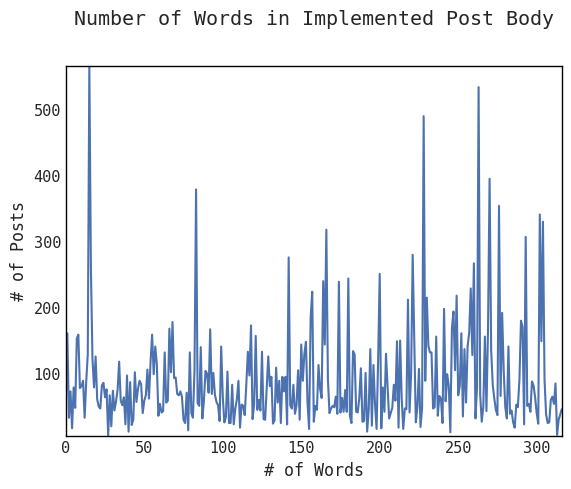

In [328]:
# counts the number of words in each post
body_length = impl_posts.body.apply(lambda x: len(x.split())).plot(title="Number of Words in Implemented Post Body")
body_length.set_xlabel('# of Words')
body_length.set_ylabel('# of Posts')
body_length

<Axes: title={'center': 'Number of Words in Implemented Post Body'}, xlabel='# of Words', ylabel='# of Posts'>

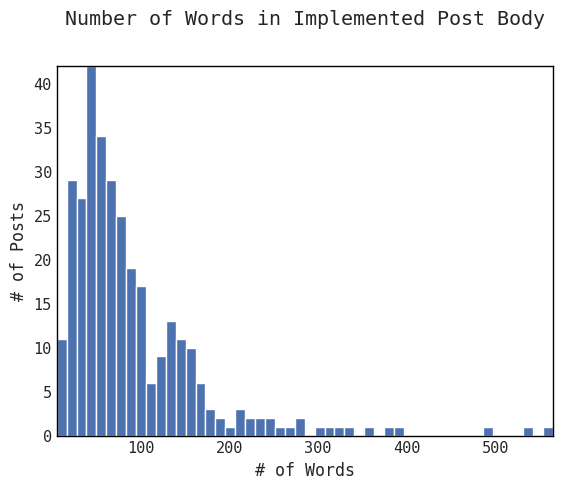

In [329]:
# counts the number of words in each post
body_length = impl_posts.body.apply(lambda x: len(x.split())).plot.hist(bins=50, title="Number of Words in Implemented Post Body")
body_length.set_xlabel('# of Words')
body_length.set_ylabel('# of Posts')
body_length

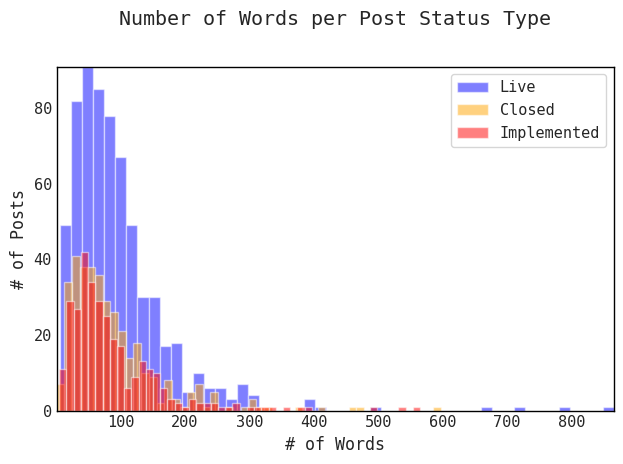

In [330]:
# filter out only implemented pots
live_posts = posts[(posts['keyword'] == 'live')]
closed_posts = posts[(posts['keyword'] == 'closed')]
plt.title('Number of Words per Post Status Type')
 
plt.hist(live_posts.body.apply(lambda x: len(x.split())),color='blue',bins=50,label='Live',alpha=0.5)
plt.hist(closed_posts.body.apply(lambda x: len(x.split())),color='orange',bins=50,label='Closed',alpha=0.5)
plt.hist(impl_posts.body.apply(lambda x: len(x.split())),color='red',bins=50,label='Implemented',alpha=0.5)

 
plt.legend(loc='upper right')
plt.xlabel('# of Words')
plt.ylabel('# of Posts') 
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Number of Votes on Implemented Posts'}, xlabel='# of Votes', ylabel='# of Posts'>

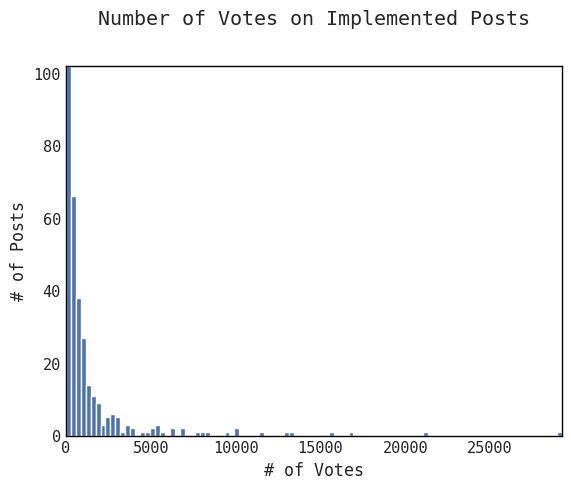

In [331]:
votes = impl_posts.votes.plot.hist(bins=100, title="Number of Votes on Implemented Posts")
votes.set_xlabel('# of Votes')
votes.set_ylabel('# of Posts')
votes

In [332]:
# 221 Posts have less than 1,000 votes
# we commonly see requested posts with at leaset 1,000 votes
(impl_posts.votes < 1000).sum()

221

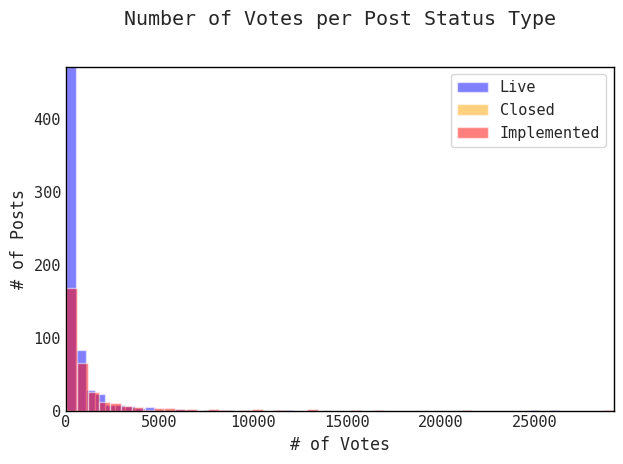

In [333]:
# filter out only implemented pots
live_posts = posts[(posts['keyword'] == 'live')]
closed_posts = posts[(posts['keyword'] == 'closed')]
plt.title('Number of Votes per Post Status Type')
 
# edgecolor='black'
plt.hist(live_posts.votes, color='blue',bins=50,label='Live',alpha=0.5)
plt.hist(closed_posts.votes, color='orange',bins=50,label='Closed',alpha=0.5)
plt.hist(impl_posts.votes, color='red',bins=50,label='Implemented',alpha=0.5)
 
plt.legend(loc='upper right')
plt.xlabel('# of Votes')
plt.ylabel('# of Posts') 
plt.tight_layout()
plt.show()

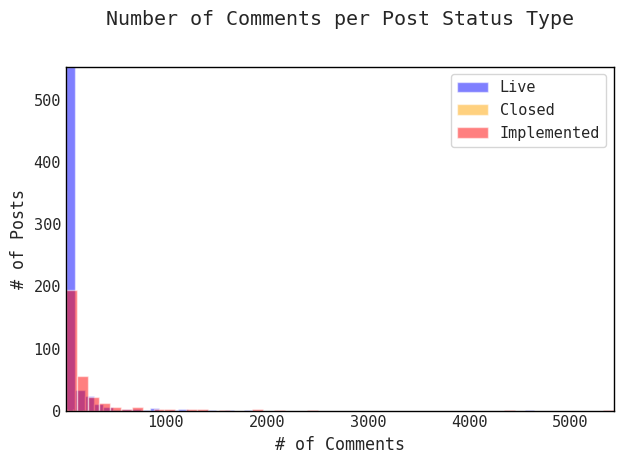

In [334]:
# filter out only implemented pots
live_posts = posts[(posts['keyword'] == 'live')]
closed_posts = posts[(posts['keyword'] == 'closed')]
plt.title('Number of Comments per Post Status Type')
 
# edgecolor='black'
plt.hist(live_posts.num_comments, color='blue',bins=50,label='Live',alpha=0.5)
plt.hist(closed_posts.num_comments, color='orange',bins=50,label='Closed',alpha=0.5)
plt.hist(impl_posts.num_comments, color='red',bins=50,label='Implemented',alpha=0.5)
 
plt.legend(loc='upper right')
plt.xlabel('# of Comments')
plt.ylabel('# of Posts') 
plt.tight_layout()
plt.show()

In [335]:
count_ideas_year = impl_posts.date.str.extract(r'(20[0-9]{2})').value_counts(sort=False)
year_counts = count_ideas_year.tolist()
years = [count_ideas_year.axes[0][i][0] for i in range(len(count_ideas_year.axes[0]))]

impl_posts['year'] = impl_posts.date.str.extract(r'(20[0-9]{2})')

/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/1045314131.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts['year'] = impl_posts.date.str.extract(r'(20[0-9]{2})')


In [336]:
# so I want a DF that has the year, mean_year, and then vote count for that individual post
# we generate a pd.Serie with the mean temperature for each year (used later for colors in the FacetGrid plot), and we create a new column in dataframe
year_mean_serie = impl_posts.groupby('year')['votes'].mean()
impl_posts['mean_year'] = impl_posts['year'].map(year_mean_serie)

/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/3201513728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts['mean_year'] = impl_posts['year'].map(year_mean_serie)


<Axes: title={'center': 'Average Votes for Implemented Ideas Each Year'}, xlabel='Year', ylabel='Average Number of Votes'>

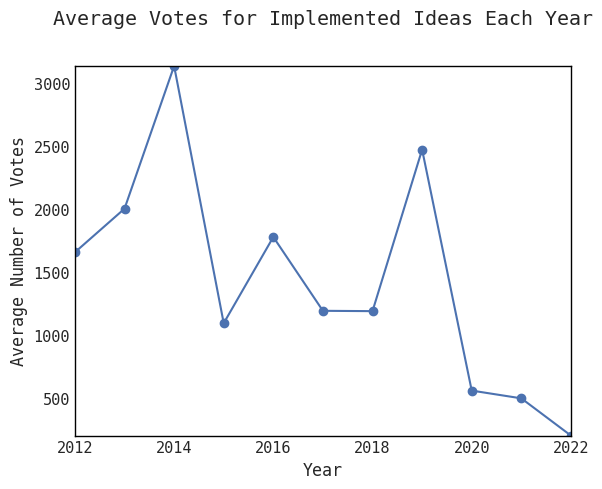

In [337]:
year_mean_serie.plot(linestyle='-', marker='o', title="Average Votes for Implemented Ideas Each Year", xlabel="Year", ylabel="Average Number of Votes")

<Axes: title={'center': 'Number of Words in Implemented Post Body'}, xlabel='# of Words', ylabel='# of Posts'>

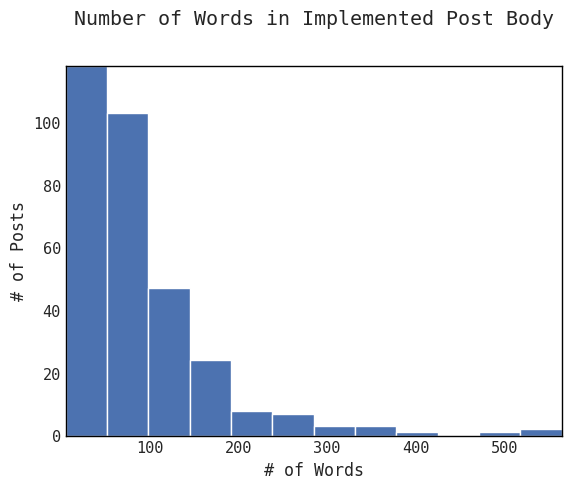

In [338]:
# counts the number of words in each post
body_length = impl_posts.body.apply(lambda x: len(x.split())).plot.hist(bins=12, title="Number of Words in Implemented Post Body")
body_length.set_xlabel('# of Words')
body_length.set_ylabel('# of Posts')
body_length

In [339]:
all_cate_raw = posts.title.str.extractall(r'\[(.*?)\]')
all_cate_count = all_cate_raw.value_counts()
all_cate = [all_cate_count.axes[0][i][0] for i in range(len(all_cate_count.axes[0]))]

# for i in all_cate:
#     print(i)

In [340]:
cate_file = 'Categories.csv'
org_cate = pd.read_csv(cate_file)
print(org_cate.columns)

Index(['Original', 'Platform', 'Feature'], dtype='object')


In [341]:
org_cate.head(5)

,Original,Platform,Feature
0,Desktop,Desktop,No
1,Mobile,Mobile,No
2,Playlists,All,No
3,All Platforms,All,No
4,Other,No,No


In [342]:
impl_posts

,Unnamed: 0,keyword,title,author,body,time,date,status,votes,num_comments,num_comment_pages,link,has_status_update,status_message,status_update_date,lang,year,mean_year
0,0,implemented,[Mobile] Click lyric to go to lyric time,marcosw,To be able to go to the lyric part of a song a...,02:43 AM,‎2022-02-08,implemented,311,10,1,https://community.spotify.com/t5/Implemented-I...,True,"Updated on 2022-12-06\nHey folks,\n \n\n\nThan...",2022-12-06,en,2022,206.500000
1,1,implemented,"[Mobile][Your Library] ""Spotify Playlists"" folder",Peter,Idea: Create a separate folder in Your Library...,08:52 AM,‎2022-01-04,implemented,102,10,1,https://community.spotify.com/t5/Implemented-I...,True,"Updated on 2022-10-12\nHey folks,\n \n\n\nThan...",2022-10-12,en,2022,206.500000
2,2,implemented,[AutoPlay] Option to toggle Autoplay on/off ac...,nirshtuhl,The Autoplay setting isn't working for connect...,07:39 PM,‎2021-10-26,implemented,1667,370,37,https://community.spotify.com/t5/Implemented-I...,True,"Updated on 2023-02-07\n \nHey folks,\n \nThe ""...",2023-02-07,en,2021,501.473684
3,3,implemented,[All Platforms] Support for Apple Shareplay,jtylerhartley,I would love to see Spotify adopt support for ...,07:32 PM,‎2021-10-25,implemented,106,10,1,https://community.spotify.com/t5/Implemented-I...,True,"Updated on 2022-05-24Hey folks,\nThanks for co...","2022-05-24Hey folks,",en,2021,501.473684
4,4,implemented,[Desktop][Playlists] Enhance Playlist on Desktop,caduceusmi7,Please introduce the Enhance Playlist on Deskt...,03:22 PM,‎2021-10-21,implemented,620,40,4,https://community.spotify.com/t5/Implemented-I...,True,Updated on 2022-10-07\n Hey folks!\n\n\nThanks...,2022-10-07,en,2021,501.473684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,314,implemented,Please make the Spotify Android app functional...,SteveBrammer,A new version of the Spotify iOS app (0.4.23) ...,01:43 AM,‎2012-02-11,implemented,301,30,3,https://community.spotify.com/t5/Implemented-I...,True,"As many of you know, we released the new versi...",NaN,en,2012,1658.376471
313,315,implemented,iPad app,Niklas,We want a ipad app! 🙂,10:34 PM,‎2012-02-09,implemented,809,240,24,https://community.spotify.com/t5/Implemented-I...,False,NaN,NaN,en,2012,1658.376471
314,316,implemented,Way to prevent duplicates in playlists.,LakeWorthB,"I have big playlists, and would like a built i...",09:43 PM,‎2012-02-09,implemented,5440,510,51,https://community.spotify.com/t5/Implemented-I...,True,Update 2015-03-17\n \nHello everyone. Spotify ...,NaN,en,2012,1658.376471
315,317,implemented,Enable email registration to Spotify,jayy,It would be nice to be able to open up the reg...,06:35 PM,‎2012-02-09,implemented,1096,220,22,https://community.spotify.com/t5/Implemented-I...,True,We’re delighted to offer our users yet another...,NaN,en,2012,1658.376471


In [343]:
impl_posts.title.str.extractall(r'\[(.*?)\]')

0
    match               
0   0             Mobile
1   0             Mobile
    1       Your Library
2   0           AutoPlay
3   0      All Platforms
...                  ...
295 0      All Platforms
296 0       Partnerships
305 0            Windows
307 0            Desktop
316 0          Playlists

[255 rows x 1 columns]

In [344]:
unfiltered_cate_count = impl_posts.title.str.extractall(r'\[(.*?)\]').value_counts()

In [345]:
platforms = {}

plat_cate = set(org_cate.Platform)
plat_cate.remove('No')

# Create platforms dictionary for counting posts
for i in sorted(plat_cate):
    platforms[i] = 0

In [346]:
for idx, i in enumerate(unfiltered_cate_count):
    plat = org_cate[org_cate['Original'] == unfiltered_cate_count.axes[0][idx][0]].Platform.values[0]
    if plat != 'No' and plat in platforms:
        platforms[plat] += i

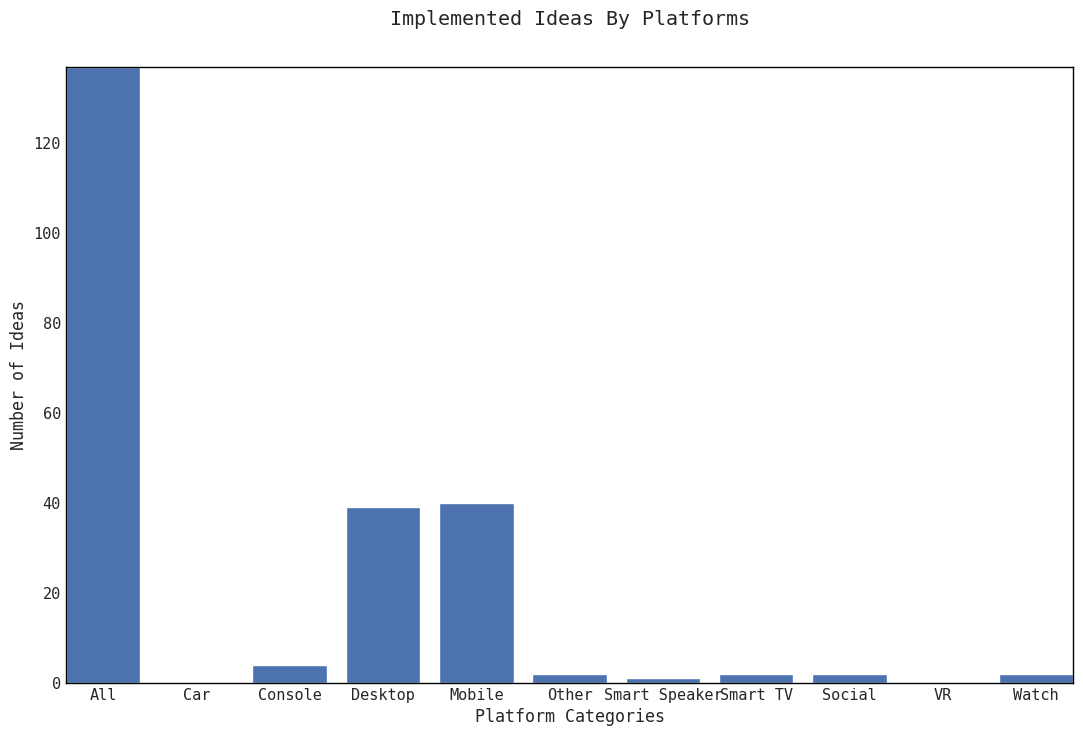

In [347]:
# Plot by Platform Categories
plat_keys = platforms.keys()
plat_values = platforms.values()

plt.figure(figsize=(13,8))
plt.bar(plat_keys, plat_values)
plt.title("Implemented Ideas By Platforms")
plt.xlabel("Platform Categories")
plt.ylabel("Number of Ideas")
plt.show()

In [348]:
# Features
features = {}

for i in sorted(org_cate[org_cate['Feature'] == 'Yes'].Original.values):
    features[i] = 0

In [349]:
for idx, i in enumerate(unfiltered_cate_count):
    feat = unfiltered_cate_count.axes[0][idx][0]
    if feat in features:
        features[feat] += i

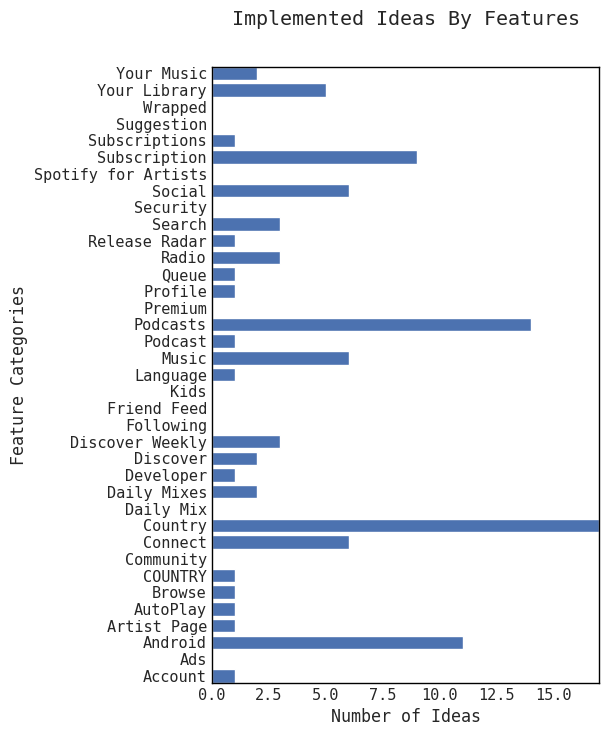

In [350]:
feat_keys = [i for i in features.keys()]
feat_values = [i for i in features.values()]

plt.figure(figsize=(5,8))
plt.barh(feat_keys, feat_values)
plt.title("Implemented Ideas By Features")
plt.ylabel("Feature Categories")
plt.xlabel("Number of Ideas")
plt.show()

Text(0, 0.5, '# of Times')

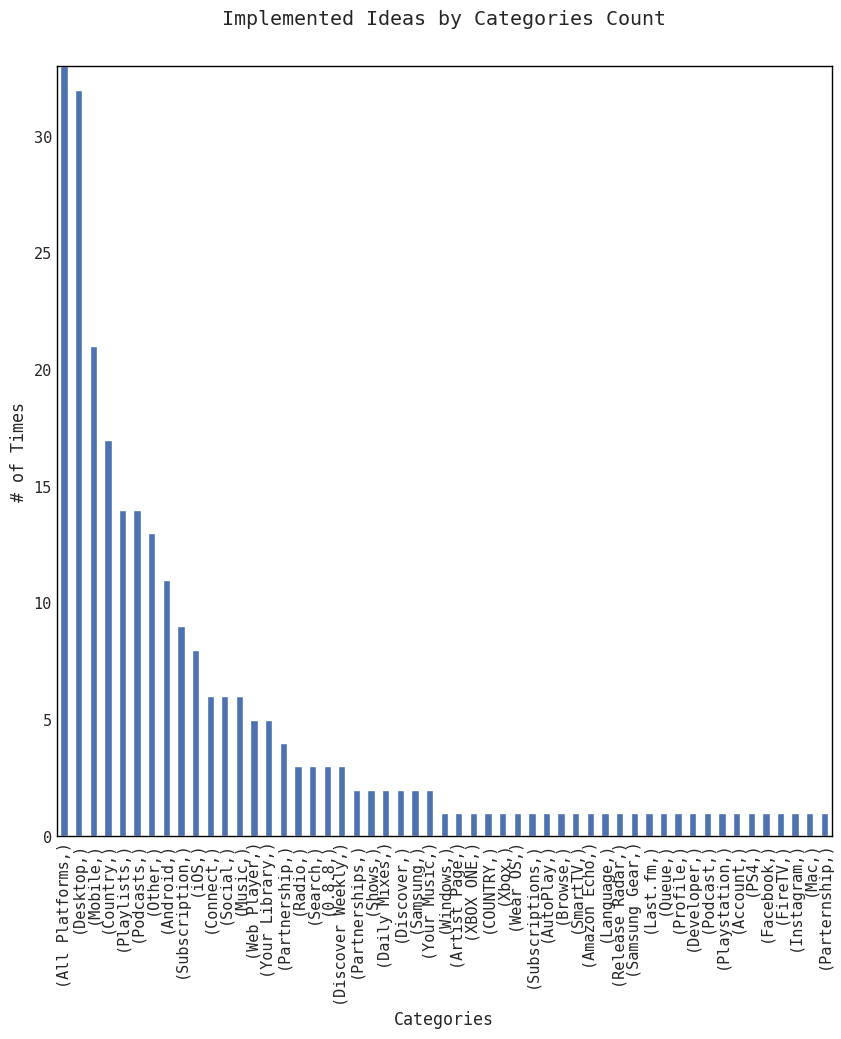

In [351]:
# posts categories
categories = impl_posts.title.str.extractall(r'\[(.*?)\]')

# ax = categories.value_counts().plot(kind='bar', figsize=(30, 15), title='Implemented Ideas by Categories Count')
ax = categories.value_counts().plot(kind='bar', figsize=(10, 10), title='Implemented Ideas by Categories Count')
ax.set_xlabel('Categories')
ax.set_ylabel('# of Times')

In [352]:
categories.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

All Platforms      12.9%
Desktop            12.5%
Mobile              8.2%
Country             6.7%
Playlists           5.5%
Podcasts            5.5%
Other               5.1%
Android             4.3%
Subscription        3.5%
iOS                 3.1%
Connect             2.4%
Social              2.4%
Music               2.4%
Web Player          2.0%
Your Library        2.0%
Partnership         1.6%
Radio               1.2%
Search              1.2%
0.8.8               1.2%
Discover Weekly     1.2%
Partnerships        0.8%
Shows               0.8%
Daily Mixes         0.8%
Discover            0.8%
Samsung             0.8%
Your Music          0.8%
Windows             0.4%
Artist Page         0.4%
XBOX ONE            0.4%
COUNTRY             0.4%
Xbox                0.4%
Wear OS             0.4%
Subscriptions       0.4%
AutoPlay            0.4%
Browse              0.4%
SmartTV             0.4%
Amazon Echo         0.4%
Language            0.4%
Release Radar       0.4%
Samsung Gear        0.4%


Text(0, 0.5, '')

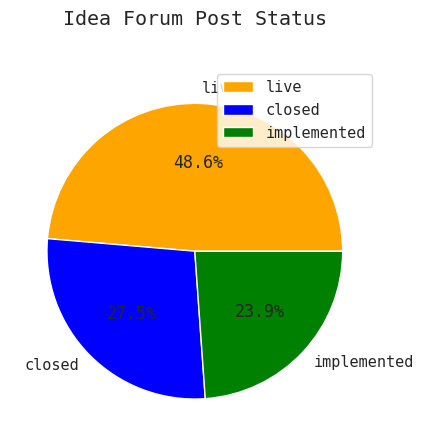

In [353]:
# Idea status distribution
ax = posts.keyword.value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, label=None, title='Idea Forum Post Status', colors=["orange", "blue", "green"])
ax.set_ylabel('')

Text(0, 0.5, '# of Times')

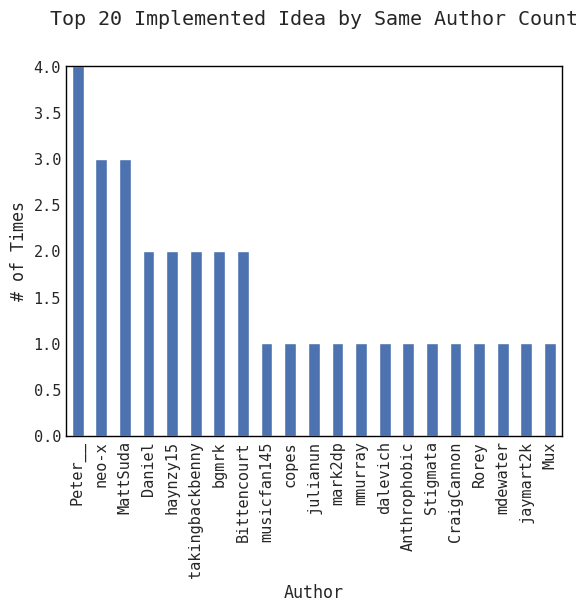

In [354]:
# implemented & author correlation
num_authors = 20
same_author_count = posts[(posts['keyword'] == 'implemented') & (posts['author'] != 'user-removed')].author.value_counts()
ax = same_author_count.iloc[0:num_authors+1].plot(kind='bar', title= 'Top ' + str(num_authors) + ' Implemented Idea by Same Author Count')
ax.set_xlabel('Author')
ax.set_ylabel('# of Times')

In [355]:
same_author_count

author
Peter__         4
neo-x           3
MattSuda        3
Daniel          2
haynzy15        2
               ..
hugzvieira      1
z-_0zia17qi5    1
mkmkmk          1
gREENNNNN       1
COCCIDIOIDES    1
Name: count, Length: 293, dtype: int64

count
1    285
2      5
3      2
4      1
Name: count, dtype: int64


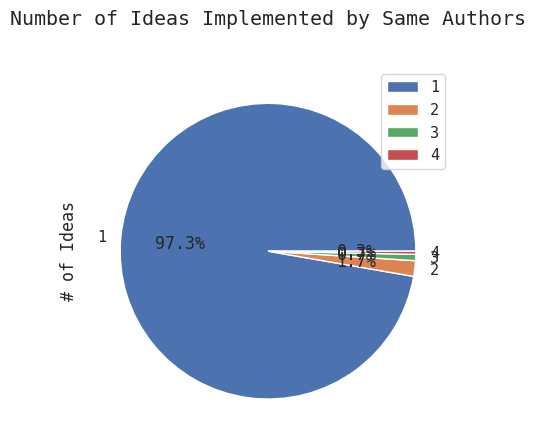

In [356]:
# Percentage distribution of same author ideas implemented N=[1, 2, 3, 4] # of times
ax = same_author_count.value_counts().plot(kind='pie', autopct='%1.1f%%', legend=True, title='Number of Ideas Implemented by Same Authors')
ax.set_ylabel('# of Ideas')
print(same_author_count.value_counts())

In [357]:
# implemented ideas over time
count_ideas_time = impl_posts.date.value_counts(sort=False)[::-1]
start_d = min(count_ideas_time.axes[0])
end_d = max(count_ideas_time.axes[0])
dates = pd.date_range(start=start_d, end=end_d, freq="D")
ideas_counts = [0] * len(dates)
for idx, d in enumerate(dates):
    date = re.search("20[0-9]{2}-[0-9]{2}-[0-9]{2}", str(d)).group()
    if date in count_ideas_time:
        ideas_counts[idx] = count_ideas_time[date]

plt.figure(figsize=(40,10))
plt.plot(dates, ideas_counts, linestyle='-', marker='o')
plt.title("Number of Implemented Ideas Over Time")
plt.xlabel("Time")
plt.ylabel("Number of Ideas")
plt.show()

DateParseError: Unknown datetime string format, unable to parse: ‎2012-02-09

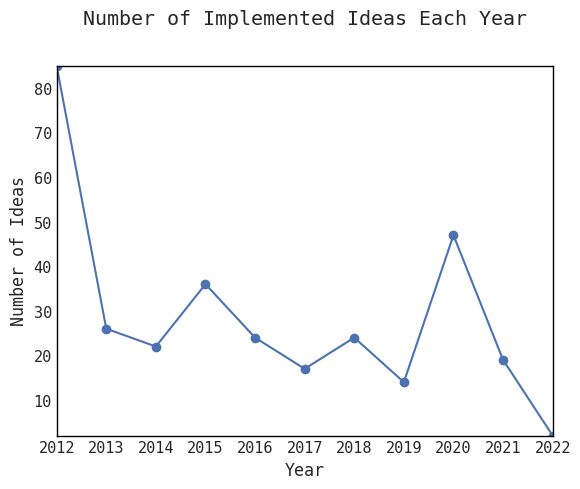

In [ ]:
count_ideas_year = impl_posts.date.str.extract(r'(20[0-9]{2})').value_counts(sort=False)
year_counts = count_ideas_year.tolist()
years = [count_ideas_year.axes[0][i][0] for i in range(len(count_ideas_year.axes[0]))]
plt.plot(years, year_counts, linestyle='-', marker='o')
plt.title("Number of Implemented Ideas Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Ideas")
plt.show()

In [ ]:
impl_posts.groupby('keyword')['votes'].mean()

keyword
implemented    1471.844937
Name: votes, dtype: float64

In [ ]:
# year_mean_serie = impl_posts.groupby('year')['votes'].mean()
# impl_posts['mean_year'] = impl_posts['year'].map(year_mean_serie)
impl_posts.groupby('keyword')['year'].value_counts()

keyword      year
implemented  2012    85
             2020    47
             2015    36
             2013    26
             2016    24
             2018    24
             2014    22
             2021    19
             2017    17
             2019    14
             2022     2
Name: count, dtype: int64

In [ ]:
impl_posts_2020 = impl_posts.loc[impl_posts.year == '2020']

In [ ]:
from datetime import datetime as dt
import calendar

# https://pynative.com/python-get-the-day-of-week/

# impl_posts_2020.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").weekday())
impl_posts_2020['weekday'] = impl_posts_2020.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").strftime('%A'))

/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/2381785819.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts_2020['weekday'] = impl_posts_2020.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").strftime('%A'))


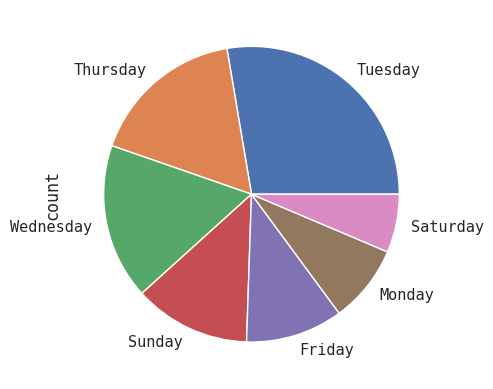

In [ ]:
# impl_posts_2020.plot.pie(subplots=True)
impl_posts_2020.weekday.value_counts().plot.pie();

In [ ]:
impl_posts['weekday'] = impl_posts.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").strftime('%A'))

/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/362295023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts['weekday'] = impl_posts.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").strftime('%A'))


In [ ]:
impl_posts['monthday'] = impl_posts.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").strftime("%d"))

/var/folders/8d/h9kpfzhn62g2sh22v0q3bm200000gn/T/ipykernel_67848/3204399522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impl_posts['monthday'] = impl_posts.date.map(lambda x: dt.strptime(x, "%Y-%m-%d").strftime("%d"))


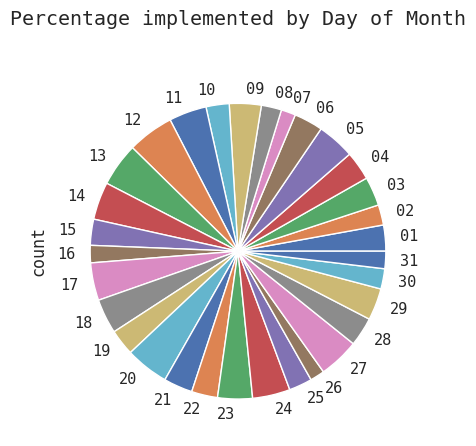

In [ ]:
impl_posts.monthday.value_counts().sort_index().plot.pie(title="Percentage implemented by Day of Month");

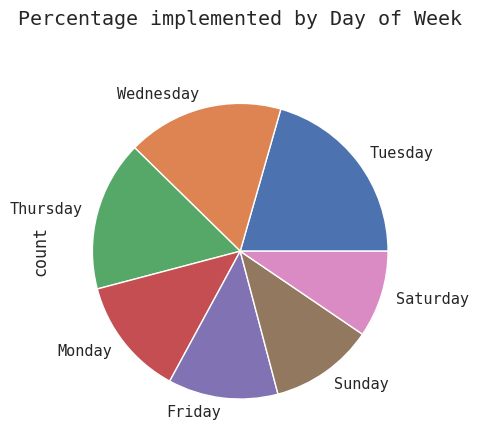

In [ ]:
impl_posts.weekday.value_counts().plot.pie(title="Percentage implemented by Day of Week");

In [ ]:
# p1 = sns.heatmap(impl_posts.weekday.value_counts().values[:, np.newaxis])

In [ ]:
# Calendar heatmap 
import july
from july.utils import date_range

dates = date_range("2020-01-01", "2020-12-31")
data = np.random.randint(0, 14, len(dates))

<Axes: title={'center': 'Github Activity'}>

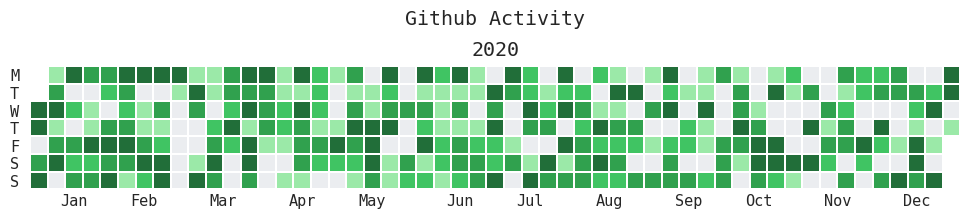

In [ ]:
# GitHub Activity like plot (for someone with consistently random work patterns).
july.heatmap(dates, data, title='Github Activity', cmap="github")

In [ ]:
# more options here
# https://github.com/e-hulten/july
# july.heatmap(dates, impl_posts['day'].value_counts().sort_index().values, title='Github Activity', cmap="github")

<Axes: title={'center': 'January'}>

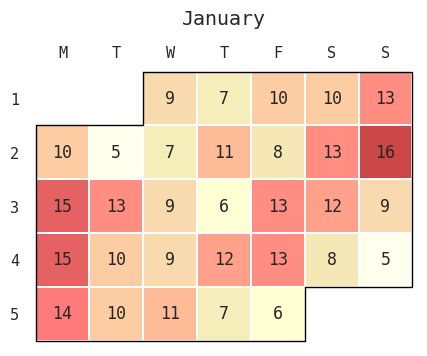

In [ ]:
july.month_plot(dates, impl_posts['day'].value_counts().sort_index().values, value_label=True)

In [ ]:
impl_posts['day'] = impl_posts.date.str.extract(r'20[0-9]{2}-[0-9]{2}-([0-9]{2})')

In [ ]:
impl_posts['day'].value_counts().sort_index().values

array([ 9,  7, 10, 10, 13, 10,  5,  7, 11,  8, 13, 16, 15, 13,  9,  6, 13,
       12,  9, 15, 10,  9, 12, 13,  8,  5, 14, 10, 11,  7,  6])

In [ ]:
len(impl_posts['day'].value_counts().sort_index().values)

31